In [8]:
import numpy as np
import utils
import matplotlib.pyplot as plt

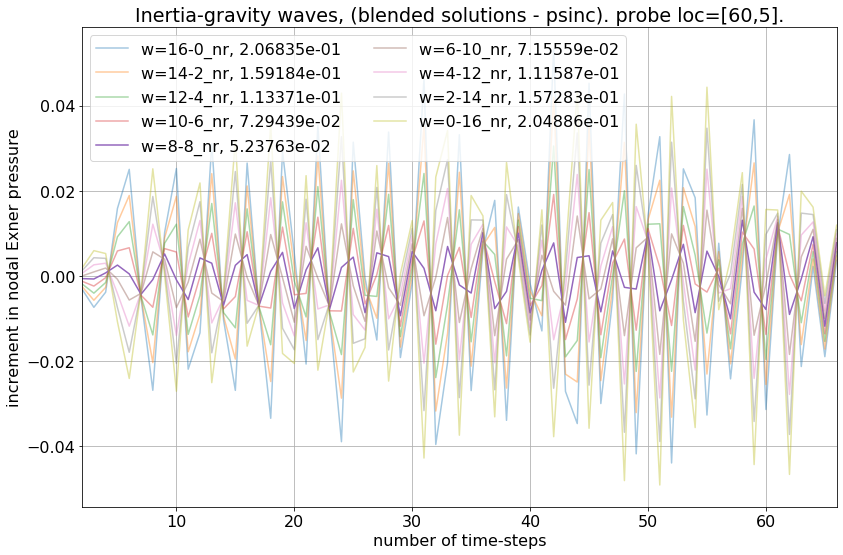

In [47]:
base_fn = "output_internal_long_wave"
py_directory = "../%s/" %base_fn

Nx = 301
Ny = 10
et = 30.0

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

scales = ['standard', 'long', 'planetary']
scale = scales[0]

steps = np.arange(67)
steps = steps[1:]
probe_loc = [60,5]
comp = []
psinc = []
cb1, cb2 = [], []
attribute = 'p2_nodes'

diff = True

def get_cbs(cbs,cbs_suffix):
    cbs_suffix = '%s_%s' %(scale,cbs_suffix) 
    cb_suffix = tc.cb_suffix(cbs[0],cbs[1],cbs_suffix)
    return [(tc.get_time_series(steps,1,attribute,cb_suffix,probe_loc,label_type='STEP',diff=diff))]

comp.append(tc.get_time_series(steps,1,attribute,'%s_comp_debug' %scale,probe_loc,label_type='STEP',diff=diff))
psinc.append(tc.get_time_series(steps,1,attribute,'%s_psinc_debug' %scale,probe_loc,label_type='STEP',diff=diff))

p_ref = 1e5
comp = comp[0] * p_ref
psinc = psinc[0] * p_ref
psinc -= psinc.mean()

steps_axs = steps[1:]
fig = plt.figure(figsize=(12,8))

# plt.plot(steps_axs,psinc, '-', label='psinc')

print_norm = True

for i,w in enumerate(range(0,17,2)):
    cbs, cbs_suffix = [1,0], 'w=%i-%i_nr' %(16-w,w)
    cb = get_cbs(cbs,cbs_suffix)[0] * p_ref
    
    cb -= cb.mean()
    norm = np.linalg.norm(cb-psinc)
    ps = '-' if w==0 else '-'
    
    alpha = 1.0 if w == 8 else 0.4
    if print_norm == True:
        plt.plot(steps_axs, cb-psinc, ps, label='%s, %.5e' %(cbs_suffix,norm),alpha=alpha)
    else:
        plt.plot(steps_axs, cb-psinc, ps, label='%s' %(cbs_suffix),alpha=alpha)
    
fontsize=16
plt.rcParams.update({'font.size': fontsize})

plt.grid()
plt.legend(ncol=2)
plt.xlim([steps_axs[0],steps_axs[-1]])
# plt.ylim([0.0,0.1])
plt.xlabel("number of time-steps")
plt.ylabel("increment in nodal Exner pressure")
plt.title("Inertia-gravity waves, (blended solutions - psinc). probe loc=[%i,%i]." %(probe_loc[0],probe_loc[1]))

plt.tight_layout()
# plt.savefig("RBVS_optimal_weights_last_50.pdf")
# plt.savefig("RBVS_optimal_weights_full.pdf")
plt.show()